<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy_122_errorprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Red'> *Uncorrelated* Error Propagation Lab </font>

#   <font color='Red'> Name  </font>

#  <font color='Red'> Date  </font>

#   <font color='Green'> Objective  </font>

### <font color='Green'> The objective here is from a theory $f(\xi_i)$ on variables $\xi_i$, to derive errors/uncertainties from their *uncorrelated* errors/uncertainties, i.e. $\delta \xi_i = \sigma_i$. </font>


<font color='Green'>
Correlated Errors, for instance, are slightly more complicated and beyond the scope of this lab.

The Theory will describe how to, different theories will yield different errors. Theories which have smaller errors are tenatively more correct.</font>

#   <font color='Green'> 00. Introduction  </font>

### <font color='Green'> Let's begin as always by introducing the libraries we'll use </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

π = np.pi

def Normal(x, σ, μ):
    return 1/np.sqrt(2*np.pi*σ**2) * np.exp( - (x-μ)**2/(2*σ*σ) )

### Notation

### For These labs we consider numbers $\mu_A, \mu_B, \mu_C$ with their associated errors $\sigma_A, \sigma_B, \sigma_C$ respectively.

### And $A, B, C$ to represent stochastic data, i.e. these are 1-dimensional NumPy arrays, associtated with many measurements of a certain value. Their average is given by:
\begin{align}
\mu_A &= \langle A \rangle = \frac{\sum_i A_i}{\texttt{len}(A)}\quad\quad.
\end{align}
### Whilst their variance is given by:
\begin{align}
\sigma_A^2 &= \langle A^2 \rangle - \langle A \rangle^2  = \frac{\sum_i A^2_i}{\texttt{len}(A)} - \langle A \rangle^2 \quad\quad.
\end{align}

### An important function for this lab is the Gaussian/Normal distribution. It is a *central* disribution (most of its values are in the center), and is among the most important functions in science, math, and physics. Its defined by 2 parameters $\sigma$ (the standard deviation) and $\mu$ (the center-point). Here $\mu$ represents the average value, and $\sigma$ the error for any measurement. The functional form of this function is:
\begin{align}
f(x) &= \frac{1}{\sqrt{2\pi\sigma^2}}\,\exp{\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)} = \texttt{Normal}\left( x, \sigma, \mu \right) \\
\text{such that}\quad\quad &\int_{(-∞, +∞)} f(x) \,dx = 1
\end{align}
### A few examples of this function may be plotted:

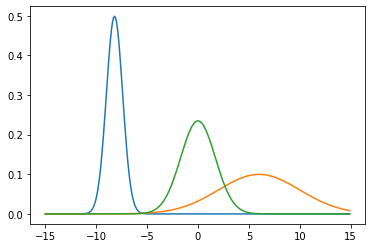

In [2]:
dx = 0.1
x  = np.arange(-15,15,dx)
plt.plot( x , Normal(x, 0.8, -8.2) )
plt.plot( x , Normal(x, 4.0, 6.0) )
plt.plot( x , Normal(x, 1.7, 0.0) )
plt.show()

### If we suppose that the errors are given by a Gaussian/Normal distribution, then we may proceed with our Error Analysis.

### Suppose we have a theory on how various variables are related, let's call this quantity of interest $f$, and it is a function of these variables. Suppose these variables are $A$, $B$, and $C$, *without loss of generality* (w.l.o.g.):
## \begin{align}
f(A, B, C)\quad\quad.
\end{align}
### But each of these variables carry their own error $\sigma_A$, $\sigma_B$, and $\sigma_C$ respectively. How then does one devise the error of $\sigma_f$? 

### For **Uncorrelated** errors may be solved for using, with the derivatives evaluated at the average (for either addition (absolute error) XOR multication (relative error)):

*   ## Addition/Subtraction (absolute error) 

### \begin{align*}
\sigma_{f}^2 &= \left(\frac{\partial f}{\partial A}\bigg|_{A\rightarrow \mu_A}\right)^2 \sigma_{A}^{-2}+\left(\frac{\partial f}{\partial B}\bigg|_{B\rightarrow \mu_B}\right)^2 \sigma_{B}^{-2}+\left(\frac {\partial f}{\partial C} \bigg|_{C\rightarrow \mu_C} \right)^2 \sigma_{C}^{-2} + \cdots  \\
\sigma_f &= \sqrt{\sum_i \left(\frac{\partial f}{\partial \xi_i} \bigg|_{\xi_i\rightarrow \mu_i}\right)^2 \sigma_i^2 }
\end{align*}

*   ## Multication/Division/Exponential (relative error)

### \begin{align*}
\frac{\sigma_{f}^2}{f^2} &= \left(\frac{\partial f}{\partial A}\bigg|_{A\rightarrow \mu_A}\right)^{-2} \sigma_{A}^{2}+\left(\frac{\partial f}{\partial B}\bigg|_{B\rightarrow \mu_B}\right)^{-2} \sigma_{B}^{2}+\left(\frac {\partial f}{\partial C} \bigg|_{C\rightarrow \mu_C} \right)^{-2} \sigma_{C}^{2} + \cdots  \\
\frac{\sigma_f}{f} &= \sqrt{\sum_i \left(\frac{\partial f}{\partial \xi_i} \bigg|_{\xi_i\rightarrow \mu_i}\right)^{-2} \sigma_i^2 }
\end{align*}

### over the function $f$ as an arbtirary function of variables $\xi_i$ and uncertainties $\sigma_i$.



#   <font color='Green'> 0. $f=A+B$  </font>

### <font color='Green'> Let $A$ and $B$ be datasets defined below.  </font> 

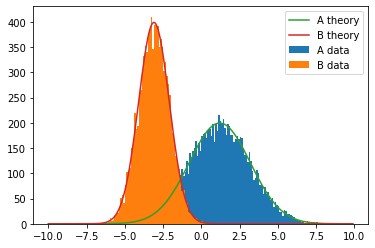

In [3]:
σ1 =  2.0
σ2 =  1.0
μ1 =  1.2
μ2 = -3.1

dx = 0.1
x  = np.arange(-10,10,dx)

N  = 10000
A = np.random.normal(μ1, σ1, N)
B = np.random.normal(μ2, σ2, N)

plt.hist(A, bins=x, label="A data")
plt.hist(B, bins=x, label="B data")

plt.plot( x , Normal(x, σ1, μ1) * N * dx, label="A theory")
plt.plot( x , Normal(x, σ2, μ2) * N * dx, label="B theory")
plt.legend()
plt.show()

### <font color='Green'> What is the sum of these two numbers with their error?  </font> 


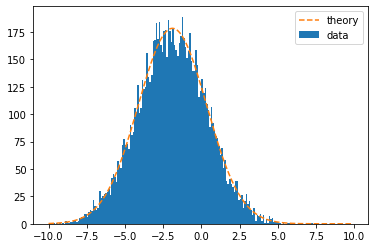

In [4]:
plt.hist(A + B, bins=x, label="data")
σ = np.sqrt(σ1**2 + σ2**2)
μ = μ1 + μ2

#plt.plot(x, Normal(x, σ1, μ) * N * dx, linestyle="dashed", label="incorrect")
plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

#   <font color='Red'> Data Sets  </font>

### <font color='Red'> Here let's define two data sets to be used in uncorrelated error propagation.</font> 

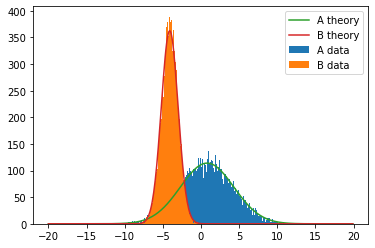

In [5]:
σ1 =  3.5
σ2 =  1.1
μ1 =  0.8
μ2 = -4.1

dx = 0.1
x  = np.arange(-20,20,dx)

N = 10000
A = np.random.normal(μ1, σ1, N)
B = np.random.normal(μ2, σ2, N)

plt.hist(A, bins=x, label="A data")
plt.hist(B, bins=x, label="B data")

plt.plot( x , Normal(x, σ1, μ1) * N * dx, label="A theory")
plt.plot( x , Normal(x, σ2, μ2) * N * dx, label="B theory")
plt.legend()
plt.show()

#   <font color='Red'> 1. $f=aA$  </font>

### <font color='Red'> Let $a$ be some constant and $A$ be a dataset. </font> 

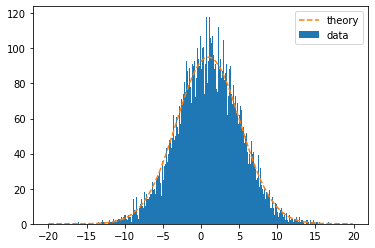

In [6]:
a = 1.2

plt.hist(a*A, bins=x, label="data")
σ = np.sqrt(a**2 * σ1**2)
μ = a * μ1

#plt.plot(x, Normal(x, σ1, μ) * N * dx, linestyle="dashed", label="incorrect")
plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

#   <font color='Red'> 2. $f = aA + bB$  </font>

### <font color='Red'> Let $a,b$ be some constants and $A,B$ be a datasets. </font> 

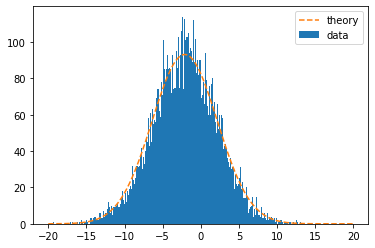

In [7]:
a = 1.20
b = 0.75

plt.hist(a*A + b*B, bins=x, label="data")
μ = a*μ1 + b*μ2
σ = np.sqrt( a**2 * σ1**2 + b**2 * σ2**2 )   ## error propagation here

plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

#   <font color='Red'> 3. $f = A * B$  </font>

### <font color='Red'> Let $A,B$ be a datasets. </font> 

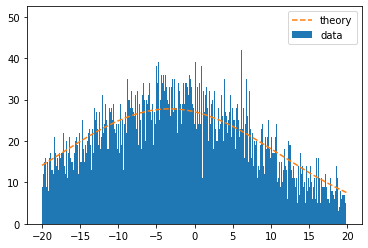

In [8]:
plt.hist(A*B, bins=x, label="data")
μ = μ1 * μ2
σ = np.sqrt( μ**2 * ((σ1/μ1)**2 + (σ2/μ2)**2) )   ## error propagation here

plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

#   <font color='Red'> 4. $f = a A^b $  </font>

### <font color='Red'> Let $a,b$ be constants and $A$ be a dataset. </font> 

\begin{align*}
\mu &= a\mu_1^b \\
\sigma_f &=  \frac{\mu b \sigma_A}{\mu_A} \\ 
\end{align*}

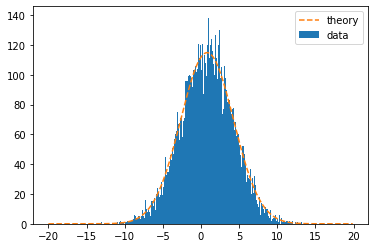

In [9]:
b = 0.99

plt.hist( (A.astype(np.complex128)**(b)).real , bins=x, label="data")
μ = μ1**(b)
σ = ( μ*b*σ1 ) / μ1   ## error propagation here

plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory") ### negative numbers have a complex value
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


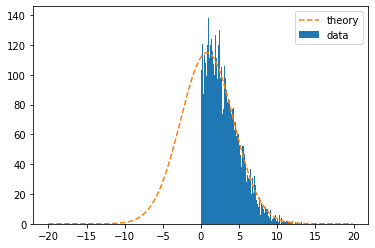

In [10]:
b = 0.99

plt.hist( (A)**(b) , bins=x, label="data")
μ = μ1**(b)
σ = ( μ*b*σ1 ) / μ1   ## error propagation here

plt.plot(x, Normal(x, σ, μ) * N * dx, linestyle="dashed", label="theory") ### negative numbers have a complex value
plt.legend()
plt.show()